In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score,KFold
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from lightgbm import plot_importance
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("./data/mushroom_train.csv", encoding="utf-8")
test_df = pd.read_csv("./data/mushroom_test.csv", encoding="utf-8")

In [3]:
df = pd.concat([train_df, test_df]).reset_index(drop=True)
df

,mushroom_id,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,1,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,2,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,3,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,4,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,NaN,k,s,n,f,n,a,c,b,...,s,o,o,p,o,o,p,b,c,l
8120,8120,NaN,x,s,n,f,n,a,c,b,...,s,o,o,p,n,o,p,b,v,l
8121,8121,NaN,f,s,n,f,n,a,c,b,...,s,o,o,p,o,o,p,b,c,l
8122,8122,NaN,k,y,n,f,y,f,c,n,...,k,w,w,p,w,o,e,w,v,l


In [4]:
df.columns

Index(['mushroom_id', 'class', 'cap-shape', 'cap-surface', 'cap-color',
       'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.nunique()

<Axes: xlabel='gill-size', ylabel='count'>

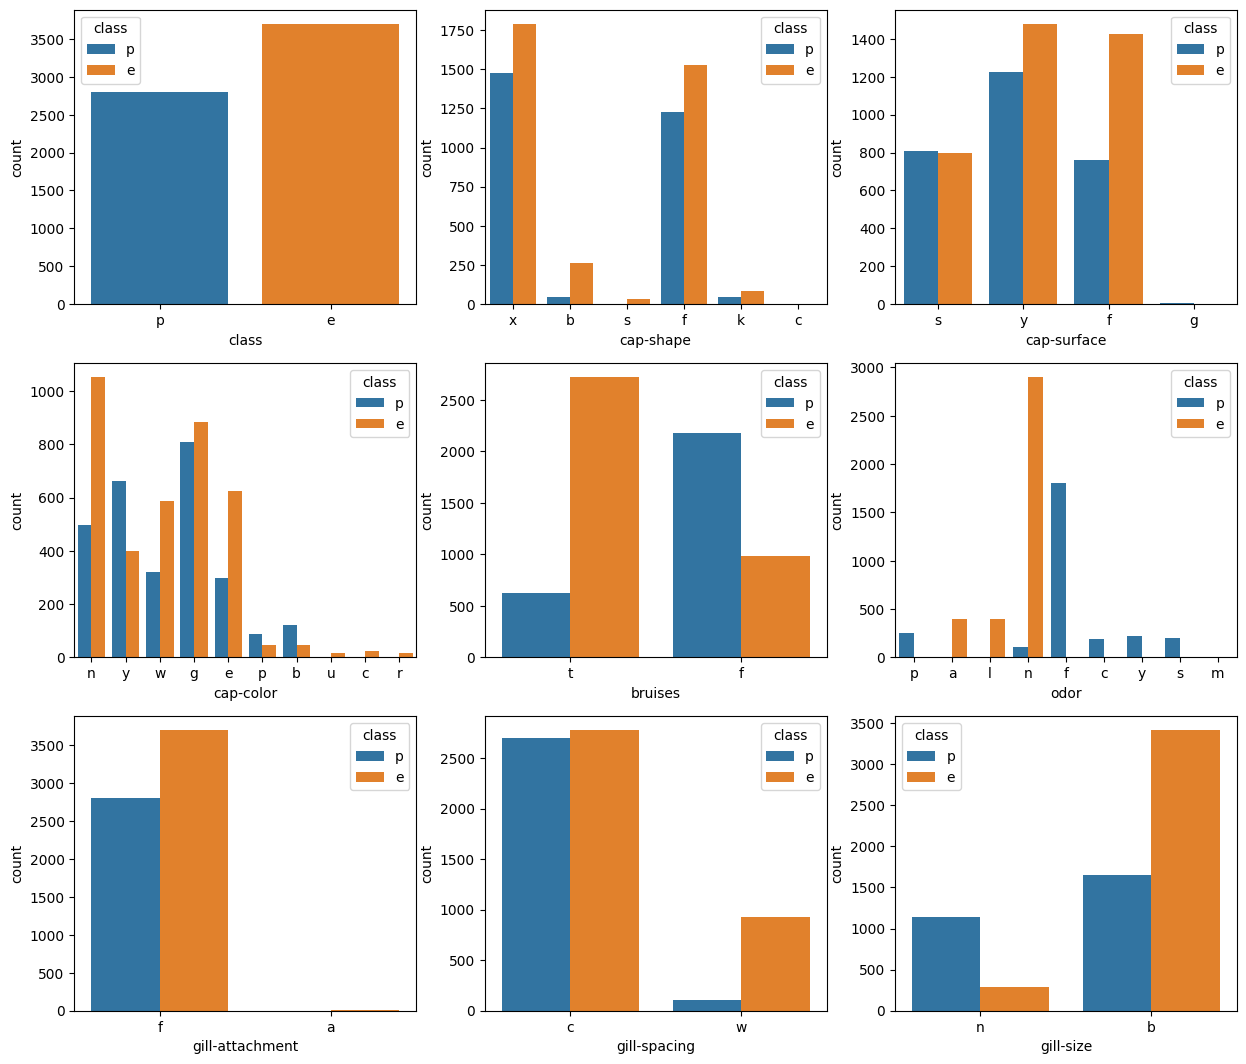

In [12]:
plt.figure(figsize=(15,13))

plt.subplot(3,3,1)
sns.countplot(data = df, x = 'class', hue = 'class')

plt.subplot(3,3,2)
sns.countplot(data = df, x = 'cap-shape', hue = 'class')

plt.subplot(3,3,3)
sns.countplot(data = df, x = 'cap-surface', hue = 'class')

plt.subplot(3,3,4)
sns.countplot(data = df, x = 'cap-color', hue = 'class')

plt.subplot(3,3,5)
sns.countplot(data = df, x = 'bruises', hue = 'class')

plt.subplot(3,3,6)
sns.countplot(data = df, x = 'odor', hue = 'class')

plt.subplot(3,3,7)
sns.countplot(data = df, x = 'gill-attachment', hue = 'class')

plt.subplot(3,3,8)
sns.countplot(data = df, x = 'gill-spacing', hue = 'class')

plt.subplot(3,3,9)
sns.countplot(data = df, x = 'gill-size', hue = 'class')


<Axes: xlabel='veil-color', ylabel='count'>

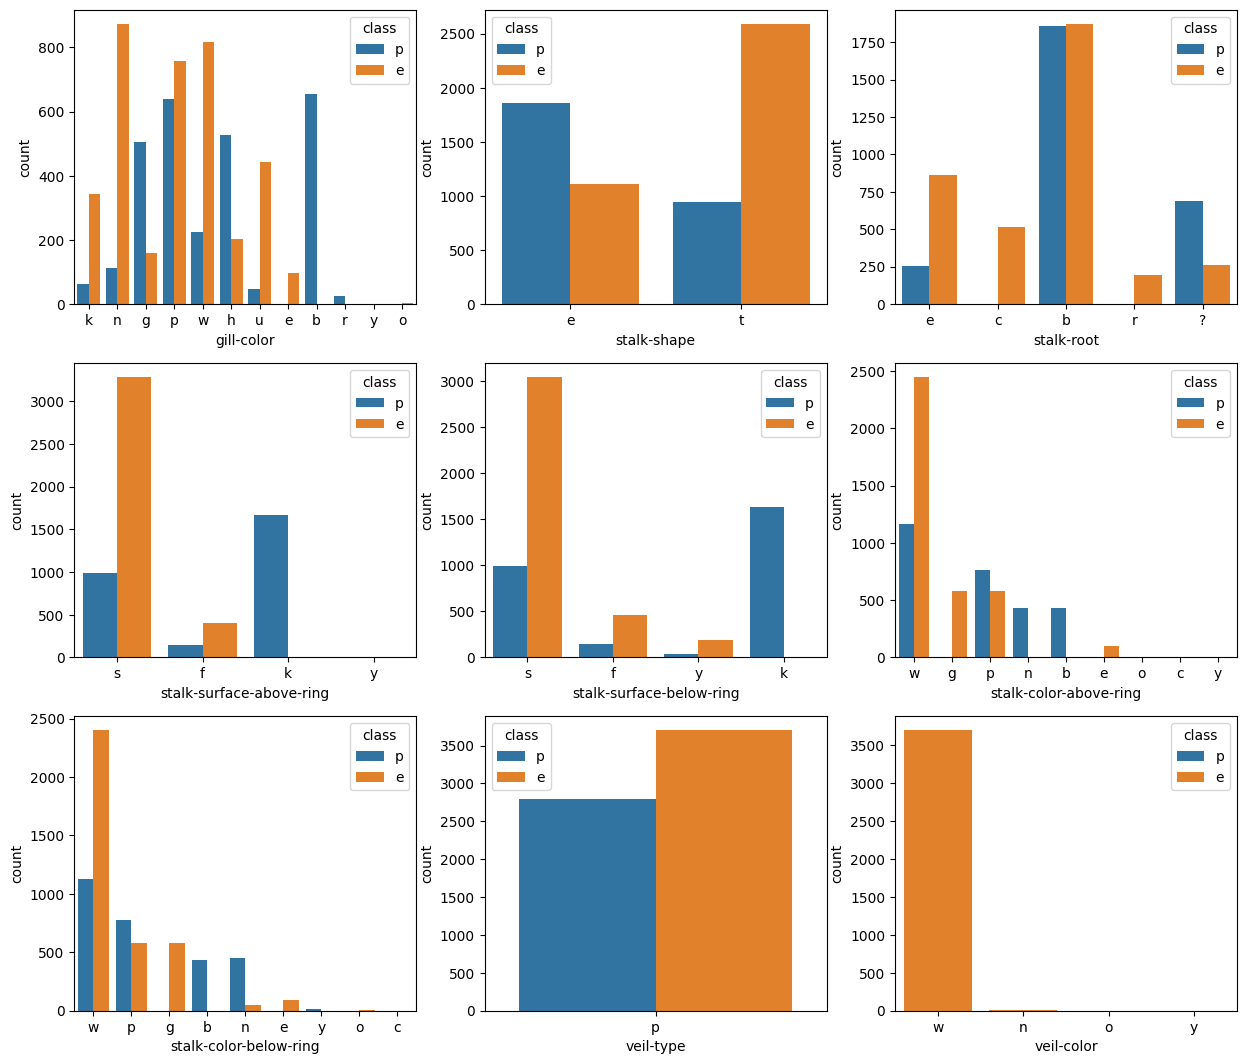

In [14]:
plt.figure(figsize=(15,13))

plt.subplot(3,3,1)
sns.countplot(data = df, x = 'gill-color', hue = 'class')

plt.subplot(3,3,2)
sns.countplot(data = df, x = 'stalk-shape', hue = 'class')

plt.subplot(3,3,3)
sns.countplot(data = df, x = 'stalk-root', hue = 'class')

plt.subplot(3,3,4)
sns.countplot(data = df, x = 'stalk-surface-above-ring', hue = 'class')

plt.subplot(3,3,5)
sns.countplot(data = df, x = 'stalk-surface-below-ring', hue = 'class')

plt.subplot(3,3,6)
sns.countplot(data = df, x = 'stalk-color-above-ring', hue = 'class')

plt.subplot(3,3,7)
sns.countplot(data = df, x = 'stalk-color-below-ring', hue = 'class')

plt.subplot(3,3,8)
sns.countplot(data = df, x = 'veil-type', hue = 'class')

plt.subplot(3,3,9)
sns.countplot(data = df, x = 'veil-color', hue = 'class')


<Axes: xlabel='habitat', ylabel='count'>

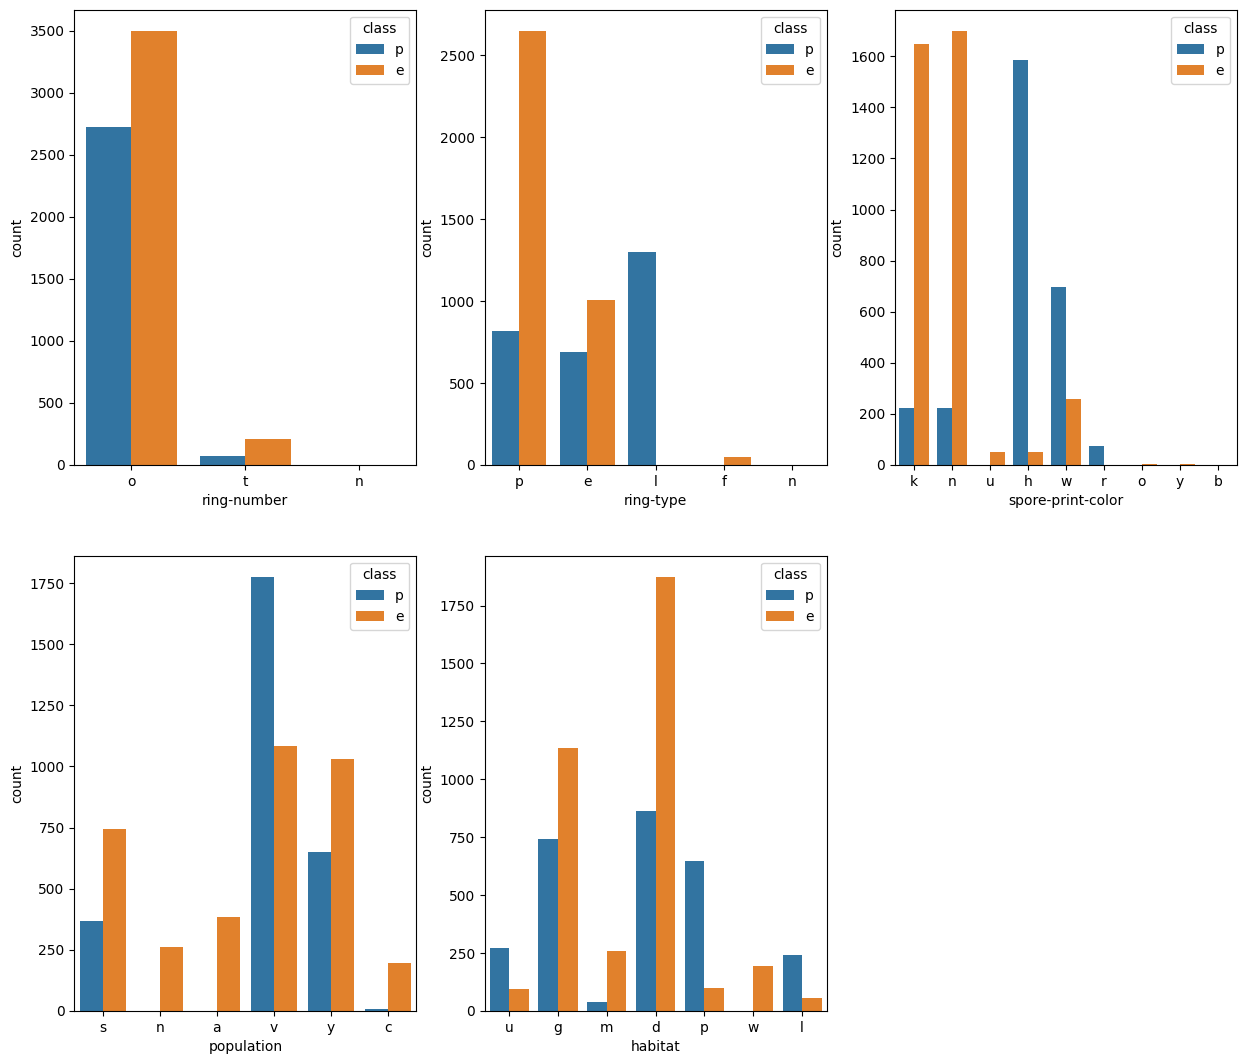

In [15]:
plt.figure(figsize=(15,13))

plt.subplot(2,3,1)
sns.countplot(data = df, x = 'ring-number', hue = 'class')

plt.subplot(2,3,2)
sns.countplot(data = df, x = 'ring-type', hue = 'class')

plt.subplot(2,3,3)
sns.countplot(data = df, x = 'spore-print-color', hue = 'class')

plt.subplot(2,3,4)
sns.countplot(data = df, x = 'population', hue = 'class')

plt.subplot(2,3,5)
sns.countplot(data = df, x = 'habitat', hue = 'class')



In [4]:
df = pd.get_dummies(data=df, columns=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
           'ring-type', 'spore-print-color', 'population', 'habitat'], drop_first=True)
df = df*1
df

,mushroom_id,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,2,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,3,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,8120,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
8121,8121,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,8122,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [5]:
train_df = df[:6500]
test_df = df[6500:]

In [6]:
print('Train Data : ',train_df.shape)
print('Test Data : ',test_df.shape)

Train Data :  (6500, 97)
Test Data :  (1624, 97)


In [7]:
test_df = test_df.drop(["class_p"],axis=1)
x_train = train_df.drop(['mushroom_id','class_p'],axis=1)
y_train = train_df['class_p']
x_test = test_df.drop(['mushroom_id'],axis=1)

In [10]:
print('X_Train Data : ',x_train.shape)
print('Y_Train Data : ',y_train.shape)
print('Test Data : ',test_df.shape)

X_Train Data :  (6500, 95)
Y_Train Data :  (6500,)
Test Data :  (1624, 96)


In [11]:
stratified_kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=1234)

In [12]:
import numpy as np

In [13]:
model = lgb.LGBMClassifier()


param_grid = { 
    "n_estimators" : np.arange(1,101,10),
    "max_depth" : np.arange(1,11,1)
    }
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=stratified_kf
)

In [14]:
grid_search.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 2519, number of negative: 3331
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430598 -> initscore=-0.279411
[LightGBM] [Info] Start training from score -0.279411
[LightGBM] [Info] Number of positive: 2519, number of negative: 3331
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 74
[LightGBM] [Info] [binary:

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=LGBMClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])})

In [23]:
grid_search.best_params_

{'max_depth': 4, 'n_estimators': 41}

In [24]:
grid_search.best_score_

1.0

In [25]:
model = lgb.LGBMClassifier(**grid_search.best_params_)

In [26]:
model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 2799, number of negative: 3701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430615 -> initscore=-0.279341
[LightGBM] [Info] Start training from score -0.279341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(max_depth=4, n_estimators=41)

In [27]:
y_test_pred = model.predict(x_test)
test_df["class"] = y_test_pred
test_df["class"] = test_df["class"].replace([1,0],["p","e"])
test_df[["mushroom_id","class"]].to_csv("./data/submission_mushroom_13.csv", index=False)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

<Figure size 1500x1000 with 0 Axes>

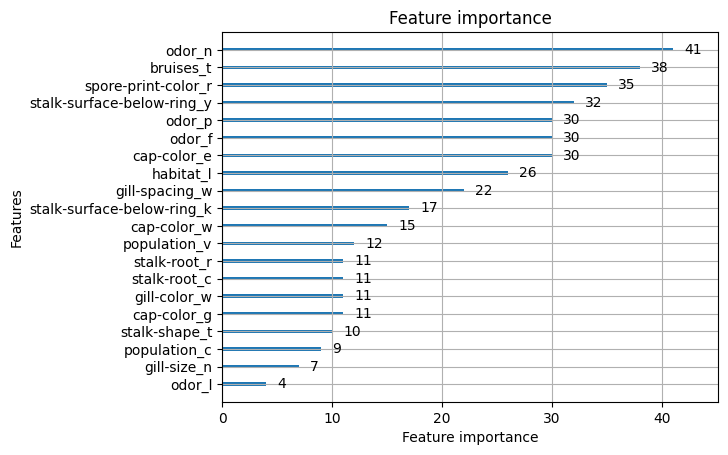

In [28]:
plt.figure(figsize=(15,10))
plot_importance(model,max_num_features = 20)

In [30]:
test_df['class'].nunique()

2

In [31]:
counts = test_df['class'].value_counts()
total = len(test_df)
percent = counts/total * 100

<Axes: xlabel='class'>

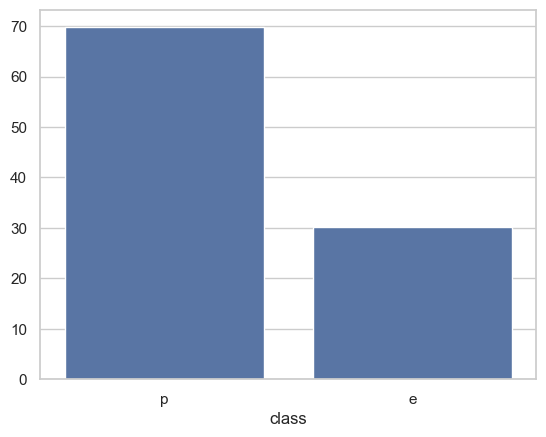

In [32]:
sns.set(style='whitegrid')
sns.barplot(
    x=percent.index,
    y=percent.values
)

In [ ]:
#끝